## Importing Necessary Libraries 

In [6]:
import numpy as np 
import pandas as pd 
import os
import itertools

#plots
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk import tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from collections import Counter
from wordcloud import WordCloud
from PIL import Image

import string
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [3]:
#pip install --upgrade paramiko

### Dataset Quick Overview

In [9]:
df=pd.read_csv(r"C:\Users\Kishore\OneDrive\Desktop\Total Machine Learning\CSV Files\TheSocialDilemma.csv")
df

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,Sentiment
0,Mari Smith,"San Diego, California",Premier Facebook Marketing Expert | Social Med...,2007-09-11 22:22:51,579942,288625,11610,False,2020-09-16 20:55:33,@musicmadmarc @SocialDilemma_ @netflix @Facebo...,NaN,Twitter Web App,False,Neutral
1,Mari Smith,"San Diego, California",Premier Facebook Marketing Expert | Social Med...,2007-09-11 22:22:51,579942,288625,11610,False,2020-09-16 20:53:17,@musicmadmarc @SocialDilemma_ @netflix @Facebo...,NaN,Twitter Web App,False,Neutral
2,Varun Tyagi,"Goa, India",Indian | Tech Solution Artist & Hospitality Ex...,2009-09-06 10:36:01,257,204,475,False,2020-09-16 20:51:57,Go watch “The Social Dilemma” on Netflix!\n\nI...,NaN,Twitter for iPhone,False,Positive
3,Casey Conway,"Sydney, New South Wales",Head of Diversity & Inclusion @RugbyAU | It's ...,2012-12-28 21:45:06,11782,1033,12219,True,2020-09-16 20:51:46,I watched #TheSocialDilemma last night. I’m sc...,['TheSocialDilemma'],Twitter for iPhone,False,Negative
4,Charlotte Paul,Darlington,Instagram Charlottejyates,2012-05-28 20:43:08,278,387,5850,False,2020-09-16 20:51:11,The problem of me being on my phone most the t...,['TheSocialDilemma'],Twitter for iPhone,False,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20063,scp.,NaN,"“Through love, all is possible.” - SJM - See m...",2013-02-19 00:55:12,431,193,32958,False,2020-10-09 00:25:53,#TheSocialDilemma yalll.... this shit... we kn...,['TheSocialDilemma'],Twitter for iPhone,False,Negative
20064,Dono6971,United States,"Father, Husband, and a Dude|| Love Notre Dame ...",2010-01-06 04:08:41,172,96,50159,False,2020-10-09 00:24:45,Peeps:\n\nFind 90 minutes this weekend and wat...,NaN,Twitter for iPhone,False,Positive
20065,Remi Shores,NaN,Genderfluid / They/Them/Theirs / Queer Christi...,2012-05-16 23:49:13,387,652,7885,False,2020-10-09 00:11:42,"So you watched #thesocialdilemma, or have been...",['thesocialdilemma'],Twitter Web App,False,Negative
20066,Scott the Great and Terrible,NaN,"I can't recall the taste of food, nor the soun...",2020-03-16 18:20:31,103,84,2976,False,2020-10-09 00:10:16,Good social media advice:\n\nChoose the thing ...,['TheSocialDilemma'],Twitter Web App,False,Positive


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20068 entries, 0 to 20067
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_name         20067 non-null  object
 1   user_location     15860 non-null  object
 2   user_description  18685 non-null  object
 3   user_created      20068 non-null  object
 4   user_followers    20068 non-null  int64 
 5   user_friends      20068 non-null  int64 
 6   user_favourites   20068 non-null  int64 
 7   user_verified     20068 non-null  bool  
 8   date              20068 non-null  object
 9   text              20068 non-null  object
 10  hashtags          15771 non-null  object
 11  source            20068 non-null  object
 12  is_retweet        20068 non-null  bool  
 13  Sentiment         20068 non-null  object
dtypes: bool(2), int64(3), object(9)
memory usage: 1.9+ MB


####  The dataset consists of 18,252 tweets with 14 columns! 

In [11]:
df['source'].unique()

array(['Twitter Web App', 'Twitter for iPhone', 'Twitter for Android',
       'Twitter for iPad', 'TweetDeck', 'Instagram', 'Buffer',
       'Vero - True Social', 'Tweetlogix', 'Streamlabs Twitter',
       'Sprout Social', 'Mailchimp', 'Hootsuite Inc.',
       'Libsyn On-Publish', 'IFTTT', 'Echofon', 'Twitter for Mac',
       'Plume\xa0for\xa0Android', 'Hypefury', 'LaterMedia', 'Cawbird',
       'Twitter Media Studio', 'Rivuu Scheduling', 'Cloud Campaign',
       'eClincher', 'HubSpot', 'Socialbakers', 'Tweetbot for iΟS',
       'Fenix 2', 'SocialFlow', 'LinkedIn', 'UberSocial for Android',
       'Twitter Web Client', 'WordPress.com', 'Oktopost', 'Tumblr',
       'Thred', 'Bollywoodlife', 'Twitterrific for iOS', 'dlvr.it',
       'Fenix for iOS', 'Dynamic Signal', 'Bitly',
       'TweetCaster for Android', 'NoReruns.net TTools', 'Amplifr',
       'Missinglettr', 'CoSchedule', 'TwInbox', 'Sprinklr Publishing',
       'Talon Android', 'Twitter for Advertisers', 'ThreadReaderApp',
      

In [14]:
#pip install missingno

## Let's visualize some missing values!

<Axes: >

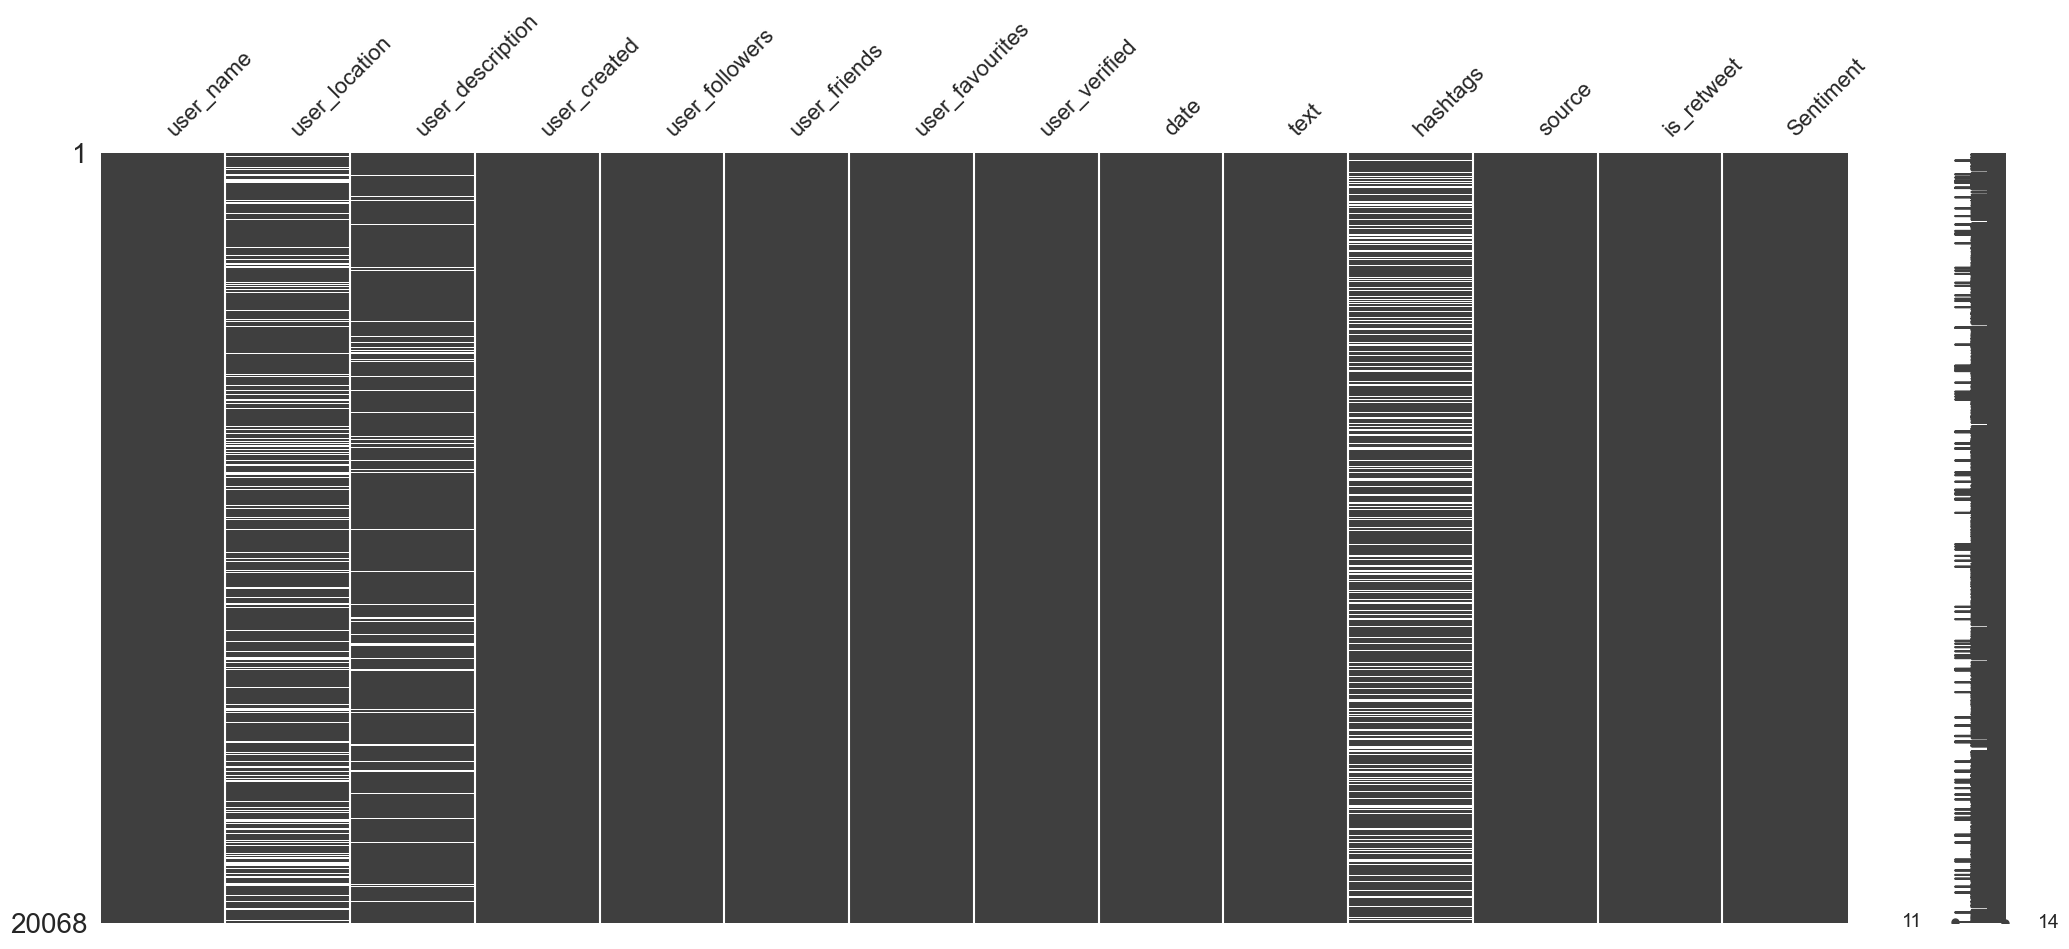

In [15]:
import missingno as mno
mno.matrix(df)

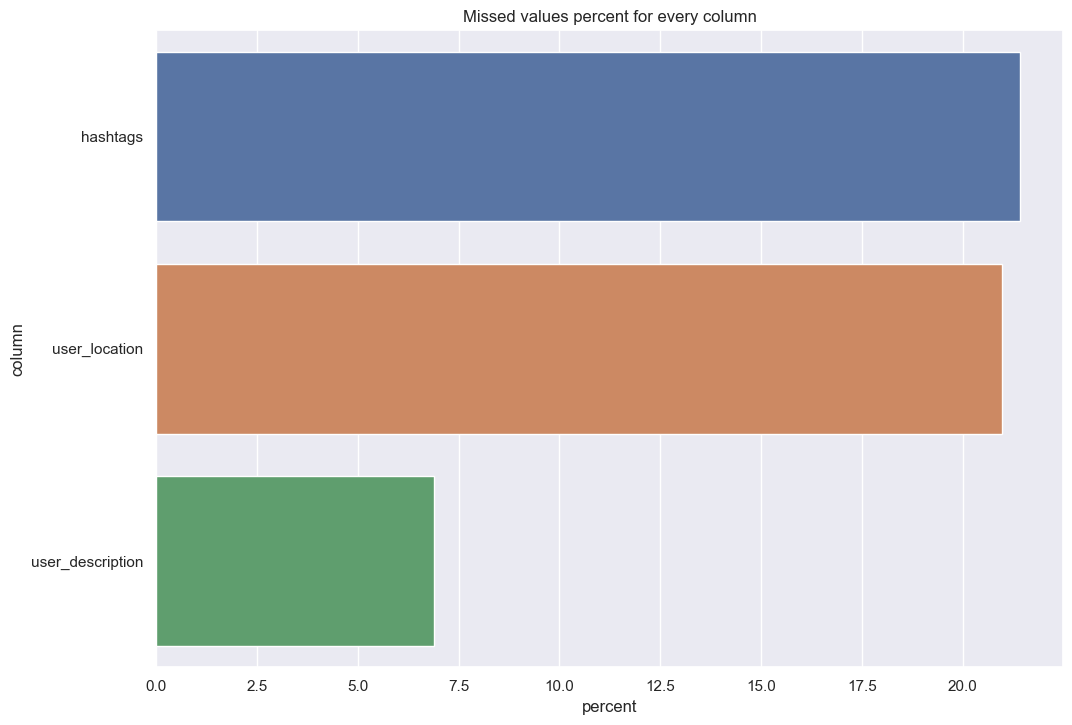

In [16]:
missed = pd.DataFrame()
missed['column'] = df.columns

missed['percent'] = [round(100* df[col].isnull().sum() / len(df), 2) for col in df.columns]
missed = missed.sort_values('percent',ascending=False)
missed = missed[missed['percent']>0]

fig = sns.barplot(
    x=missed['percent'], 
    y=missed["column"], 
    orientation='horizontal'
).set_title('Missed values percent for every column')

# Tweets EDA

## Let's visualize the sentiment of the tweets!

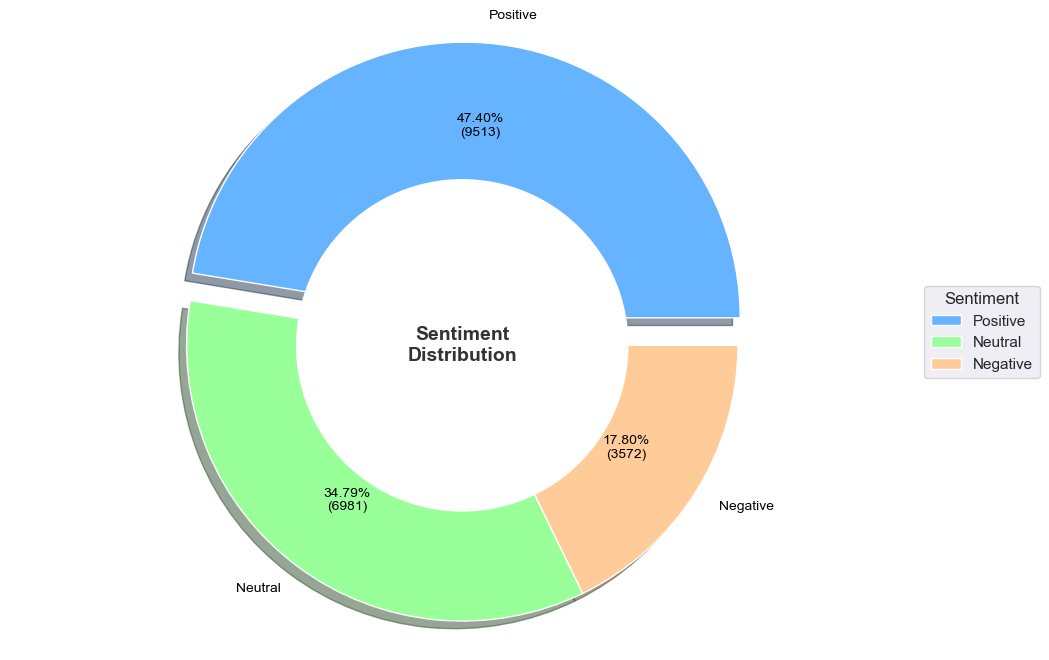

In [17]:
sentiment_counts = df['Sentiment'].value_counts()
colors = ['#66b3ff', '#99ff99', '#ffcc99']
explode = (0.1, 0, 0)  # Explode the first slice
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(
    x=sentiment_counts, 
    labels=sentiment_counts.index,
    autopct=lambda p: f'{p:.2f}%\n({int(p*sum(sentiment_counts)/100)})', 
    wedgeprops=dict(width=0.7),
    textprops=dict(size=10, color="black"),  
    pctdistance=0.7,
    colors=colors,
    explode=explode,
    shadow=True)
# Create a white circle in the middle to make it look like a donut chart
center_circle = plt.Circle((0, 0), 0.6, color='white', fc='white', linewidth=1.25)
fig.gca().add_artist(center_circle)
ax.text(0, 0, 'Sentiment\nDistribution', ha='center', va='center', fontsize=14, fontweight='bold', color='#333333')
ax.legend(sentiment_counts.index, title="Sentiment", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))# Adding legend
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


Most of the tweets are positive in nature, which denotes a wide appreciation of the documentary among the users!

 The user "OurPact" has made the highest number of tweets! No let's look into OurPact's tweets alone!

In [22]:
df[df['user_name']=='OurPact'][['text','Sentiment']]

,text,Sentiment
10741,@JimBelushi @JimBelushi We agree it's a must s...,Positive
10744,@Pink @Pink It's a must watch and demonstrates...,Positive
10847,@SwarnaPrakashM1 @HumaneTech_ @NetflixIndia @S...,Positive
10850,@mindfulmeeps @YouTube @mindfulmeeps Why keepi...,Positive
10975,@IrishinSocal @IrishinSocal A must watch. OurP...,Positive
...,...,...
15610,@ProtonMail @netflix @ProtonMail OurPact has b...,Positive
15611,@rainnwilson @rainnwilson OurPact has been kee...,Positive
15612,@Independent @Independent OurPact has been kee...,Positive
15613,@YonceVocals @YonceVocals OurPact has been kee...,Positive


 Let's check the sentiment of the tweets made by the user name OurPact 

In [20]:
df[df['user_name']=='OurPact']['Sentiment'].value_counts()

Positive    213
Neutral       4
Negative      1
Name: Sentiment, dtype: int64

The user name OurPact has created nearly 218 tweets with 213(majority) tweets in positive sentiment! Looks like Ourpact loved the documentary! 

### User created year by year 

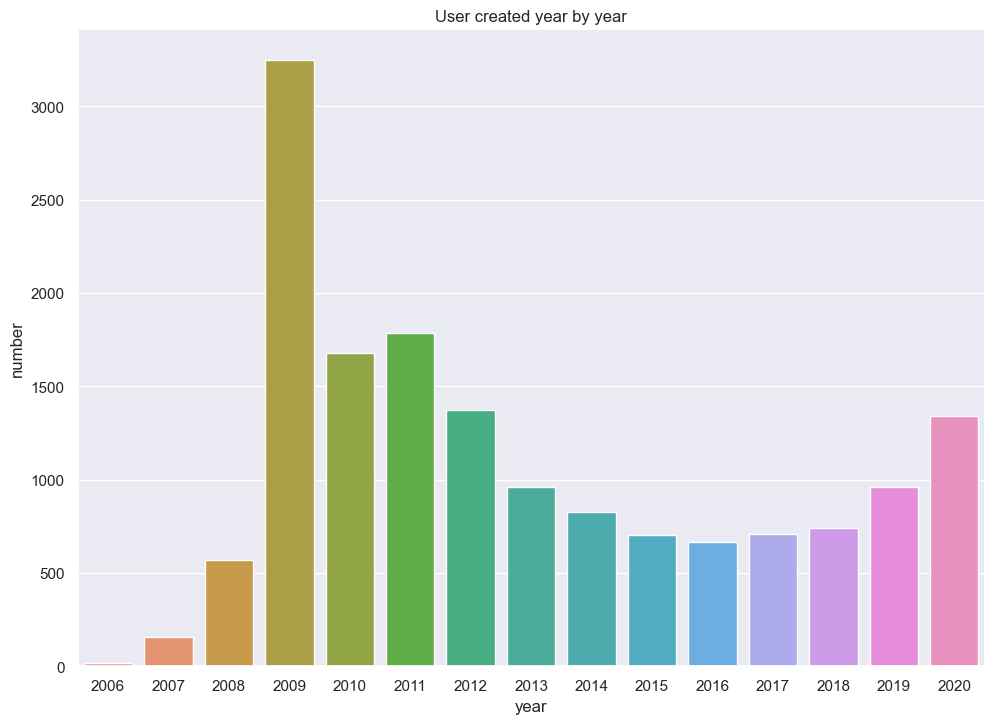

In [23]:
df['user_created'] = pd.to_datetime(df['user_created'])
df['year_created'] = df['user_created'].dt.year
df1 = df.drop_duplicates(subset='user_name', keep="first")
df1 = df1[df1['year_created']>1970]
df1 = df1['year_created'].value_counts().reset_index()
df1.columns = ['year', 'number']

fig = sns.barplot( 
    x=df1["year"], 
    y=df1["number"], 
    orientation='vertical'
    #title='', 
).set_title('User created year by year')

2009 has the highest number of users followed by the year 2011, who tweeted about the social dilemma documentary
The amount of users who joined in 2008 tweeted very less about the social dilemma documentary comapred to the other users who joined in the later years! 

## Top 20 Users location based on the number of tweets 

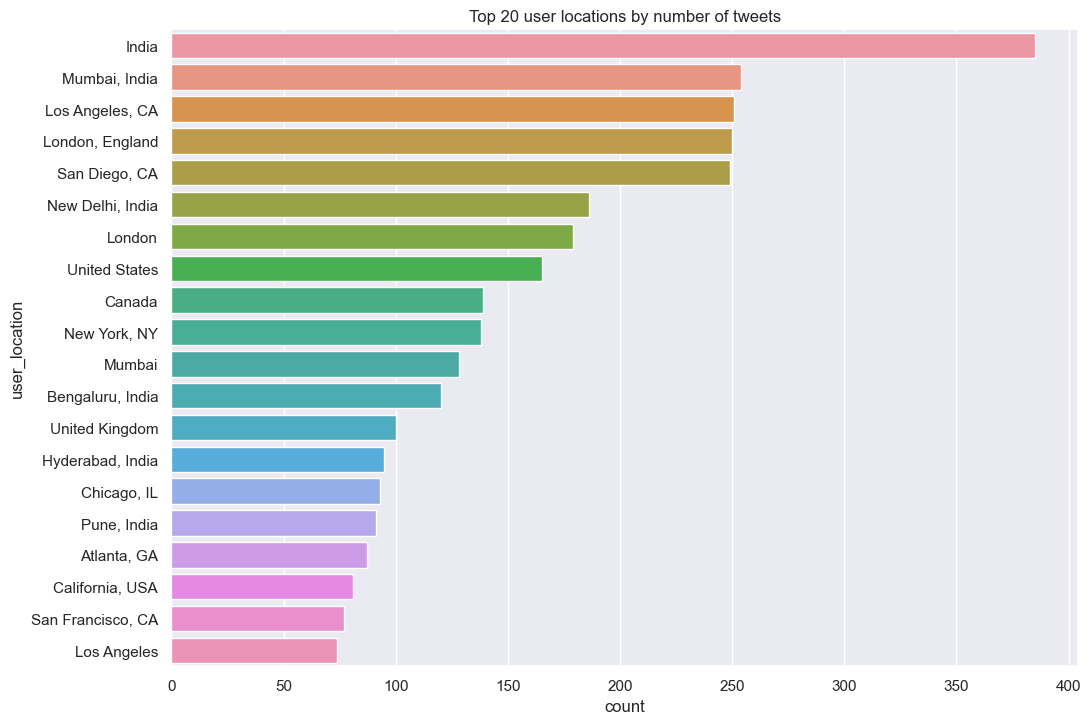

In [24]:
ds = df['user_location'].value_counts().reset_index()
ds.columns = ['user_location', 'count']
ds = ds[ds['user_location']!='NA']
ds = ds.sort_values(['count'],ascending=False)

fig = sns.barplot(
    
    x=ds.head(20)["count"], 
    y=ds.head(20)["user_location"], 
    orientation='horizontal'
).set_title('Top 20 user locations by number of tweets')

 India holds the most number of tweets by location followed by San diego and Los angeles, California!

## Visualizing the number of tweets per location!!

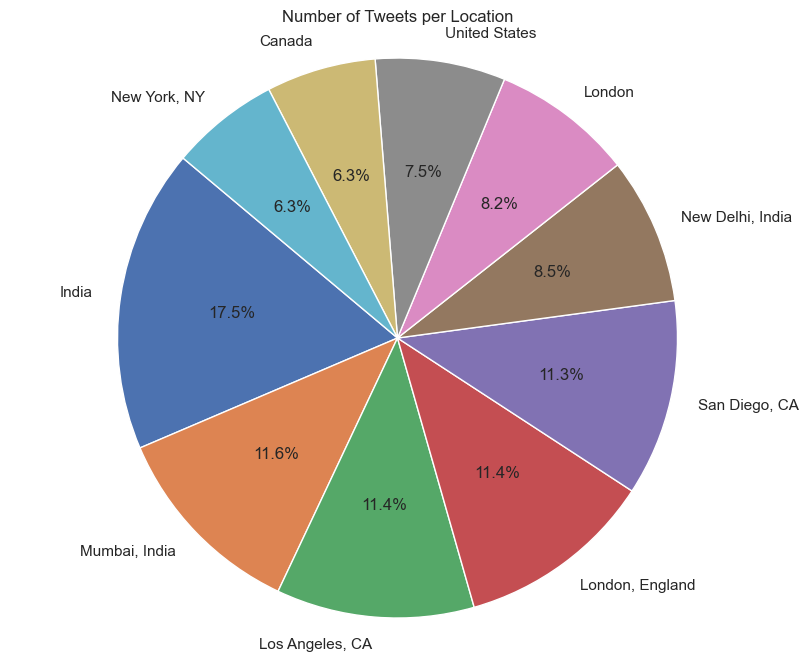

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is stored in a DataFrame called df
# Extracting relevant columns for analysis
location_tweets = df.groupby('user_location').size().reset_index(name='tweets_count')

# Sorting locations based on tweet count
location_tweets = location_tweets.sort_values(by='tweets_count', ascending=False)

# Limiting to top 10 locations for better visualization
top_locations = location_tweets.head(10)

# Plotting pie chart
plt.figure(figsize=(10, 8))
plt.pie(top_locations['tweets_count'], labels=top_locations['user_location'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Number of Tweets per Location')
plt.show()


## Top 10 user sources by number of tweets

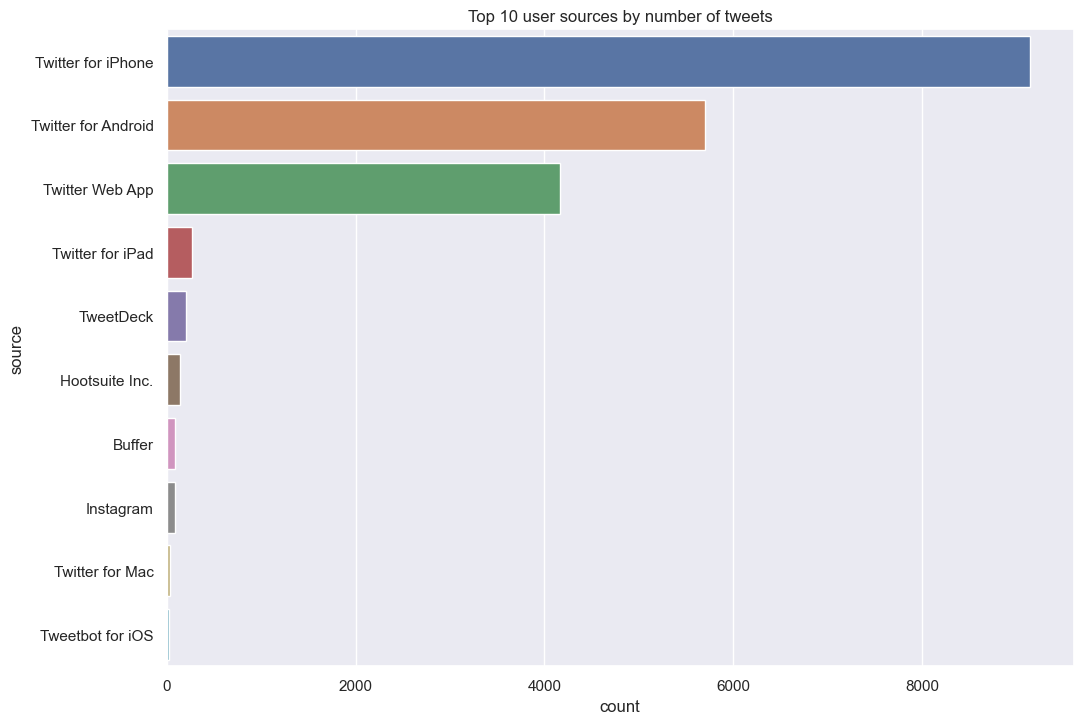

In [26]:
ds = df['source'].value_counts().reset_index()
ds.columns = ['source', 'count']
ds = ds.sort_values(['count'],ascending=False)

fig = sns.barplot(
    x=ds.head(10)["count"], 
    y=ds.head(10)["source"], 
    orientation='horizontal', 
).set_title('Top 10 user sources by number of tweets')

The most twitter tweets are made through the iphone! Followed by the android and very less people prefer web app comapred to iphone or android!

Most users use 1 hastag followed by 2 hashtag, where certain population uses no hastag while tweeting.
Very less amount of people use more than 2 hashtags in their post 

## Top 10 hastags used in the tweet!

In [27]:
def split_hashtags(x): 
    return str(x).replace('[', '').replace(']', '').split(',')

tweets_df = df.copy()
tweets_df['hashtag'] = tweets_df['hashtags'].apply(lambda row : split_hashtags(row))
tweets_df = tweets_df.explode('hashtag')
tweets_df['hashtag'] = tweets_df['hashtag'].astype(str).str.lower().str.replace("'", '').str.replace(" ", '')
tweets_df.loc[tweets_df['hashtag']=='', 'hashtag'] = 'NO HASHTAG'
#tweets_df

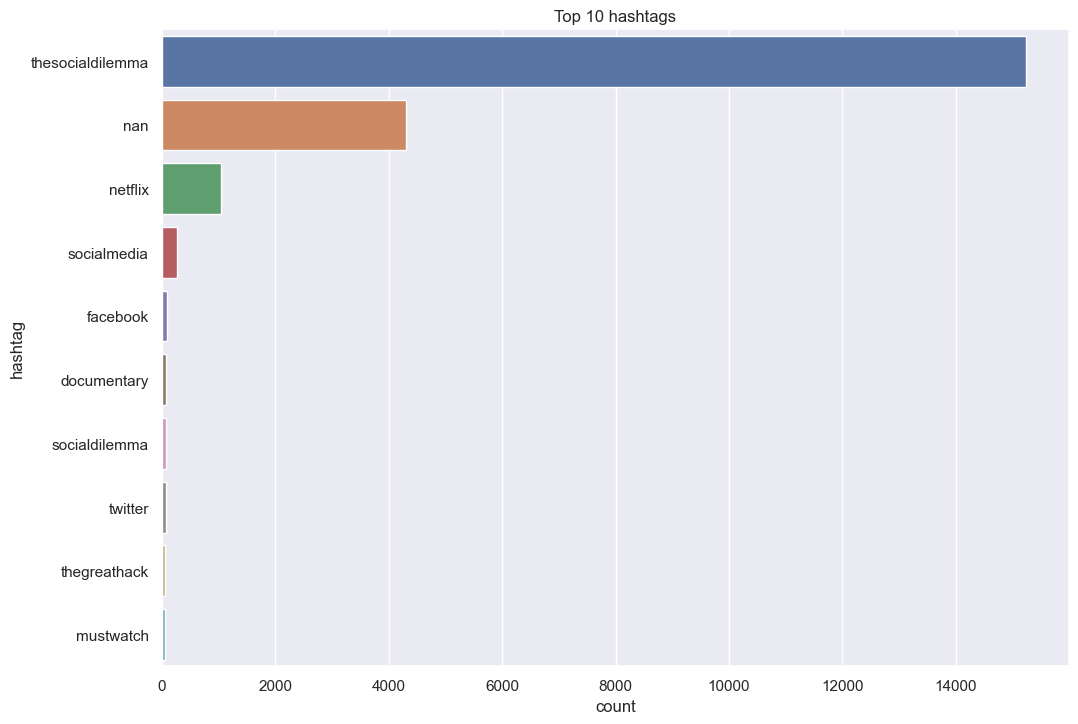

In [28]:
ds = tweets_df['hashtag'].value_counts().reset_index()
ds.columns = ['hashtag', 'count']
ds = ds.sort_values(['count'],ascending=False)
fig = sns.barplot(
    x=ds.head(10)["count"], 
    y=ds.head(10)['hashtag'], 
    orientation='horizontal', 
).set_title('Top 10 hashtags')

## Tweets text analysis 

##  Prevalent words in tweets

In [31]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
def build_wordcloud(df, title):
    wordcloud = WordCloud(
        background_color='black',colormap="Blues", 
        stopwords=set(STOPWORDS), 
        max_words=50, 
        max_font_size=40, 
        random_state=666
    ).generate(str(df))

    fig = plt.figure(1, figsize=(14,14))
    plt.axis('off')
    fig.suptitle(title, fontsize=16)
    fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

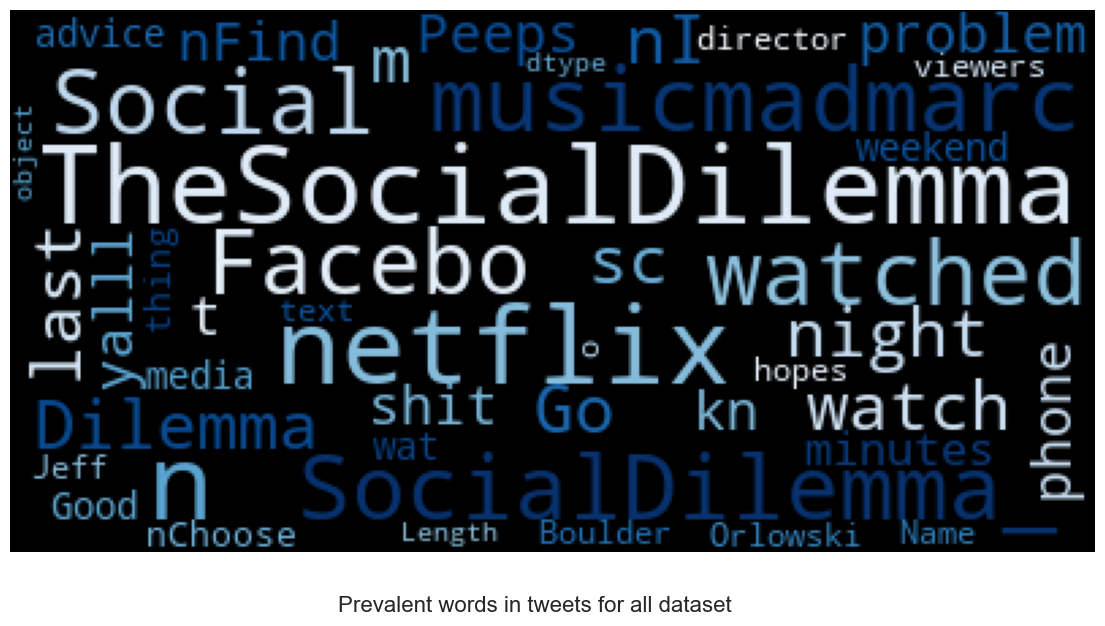

In [32]:
build_wordcloud(df['text'], 'Prevalent words in tweets for all dataset')

## Prevalent words in tweets from India

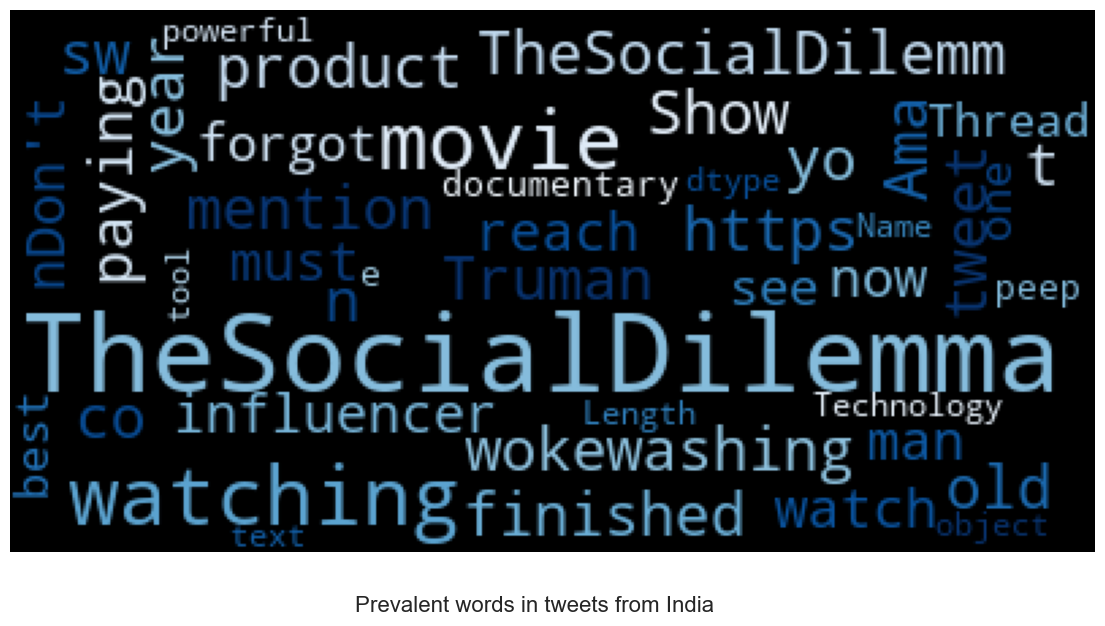

In [33]:
india_df = df.loc[df.user_location=="India"]
build_wordcloud(india_df['text'], title = 'Prevalent words in tweets from India')

In [34]:
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub(r'\s+', ' ', text.strip())
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r'[^\x00-\x7F]+', '', text)  
    text = " ".join(text.split())
    tokens = word_tokenize(text)
    
    cleaned_tokens = [stemmer.stem(token) for token in tokens if token.lower() not in stop_words]
   
    cleaned_text = ' '.join(cleaned_tokens)
    
    return cleaned_text

df["Clean_Text"] = df["text"].apply(clean)

In [35]:
analyzer = SentimentIntensityAnalyzer()

df['Vader_Score'] = df['Clean_Text'].apply(lambda text: analyzer.polarity_scores(text)['compound'])

df['Sentiment'] = df['Vader_Score'].apply(lambda score: 'positive' if score >= 0.05 else ('negative' if score <= -0.05 else 'neutral'))

df[['Clean_Text', 'Vader_Score', 'Sentiment']].head()

,Clean_Text,Vader_Score,Sentiment
0,musicmadmarc socialdilemma netflix facebook im...,0.0000,neutral
1,musicmadmarc socialdilemma netflix facebook ha...,0.0000,neutral
2,go watch social dilemma netflix best minut you...,0.5423,positive
3,watch thesocialdilemma last night im scare hum...,-0.2263,negative
4,problem phone time tri watch thesocialdilemma,-0.4019,negative


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

In [37]:
X =df ['Clean_Text'].values
y = df['Sentiment'].values

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Logistic Regression

In [40]:
logistic_classifier = LogisticRegression(max_iter=1000, random_state=42)
logistic_classifier.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [42]:
y_pred_logistic = logistic_classifier.predict(X_test_tfidf)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
classification_rep_logistic = classification_report(y_test, y_pred_logistic)
print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_logistic}")
print("Classification Report:\n", classification_rep_logistic)

Logistic Regression Results:
Accuracy: 0.8918784255107125
Classification Report:
               precision    recall  f1-score   support

    negative       0.91      0.77      0.83       954
     neutral       0.88      0.97      0.93      1816
    positive       0.90      0.87      0.88      1244

    accuracy                           0.89      4014
   macro avg       0.90      0.87      0.88      4014
weighted avg       0.89      0.89      0.89      4014



## Decision Tree Classifier 

In [43]:
decision_tree_classifier = DecisionTreeClassifier(random_state=42)
decision_tree_classifier.fit(X_train_tfidf, y_train)


DecisionTreeClassifier(random_state=42)

In [44]:
y_pred_decision_tree = decision_tree_classifier.predict(X_test_tfidf)
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
classification_rep_decision_tree = classification_report(y_test, y_pred_decision_tree)

# Print Decision Tree results
print("Decision Tree Results:")
print(f"Accuracy: {accuracy_decision_tree}")
print("Classification Report:\n", classification_rep_decision_tree)


Decision Tree Results:
Accuracy: 0.9103139013452914
Classification Report:
               precision    recall  f1-score   support

    negative       0.85      0.82      0.84       954
     neutral       0.96      0.97      0.96      1816
    positive       0.89      0.89      0.89      1244

    accuracy                           0.91      4014
   macro avg       0.90      0.89      0.90      4014
weighted avg       0.91      0.91      0.91      4014



# Random Forest Classifier

In [45]:
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

In [46]:
# Predict using the trained Random Forest classifier
y_pred_random_forest = random_forest_classifier.predict(X_test_tfidf)

# Calculate accuracy and classification report
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
classification_rep_random_forest = classification_report(y_test, y_pred_random_forest)

# Print Random Forest results
print("Random Forest Results:")
print(f"Accuracy: {accuracy_random_forest}")
print("Classification Report:\n", classification_rep_random_forest)


Random Forest Results:
Accuracy: 0.9008470353761834
Classification Report:
               precision    recall  f1-score   support

    negative       0.90      0.76      0.82       954
     neutral       0.90      0.98      0.94      1816
    positive       0.89      0.89      0.89      1244

    accuracy                           0.90      4014
   macro avg       0.90      0.88      0.89      4014
weighted avg       0.90      0.90      0.90      4014



# Support Vector Machines (SVM)

In [47]:
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train_tfidf, y_train)

SVC(kernel='linear', random_state=42)

In [48]:
y_pred_svm = svm_classifier.predict(X_test_tfidf)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm)

# Print SVM results
print("SVM Results:")
print(f"Accuracy: {accuracy_svm}")
print("Classification Report:\n", classification_rep_svm)


SVM Results:
Accuracy: 0.9255107125062282
Classification Report:
               precision    recall  f1-score   support

    negative       0.91      0.83      0.87       954
     neutral       0.94      0.98      0.96      1816
    positive       0.91      0.92      0.91      1244

    accuracy                           0.93      4014
   macro avg       0.92      0.91      0.91      4014
weighted avg       0.93      0.93      0.92      4014



# Multinomial Naive Bayes classifier

In [49]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

MultinomialNB()

In [50]:
y_pred_nb = nb_classifier.predict(X_test_tfidf)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
classification_rep_nb = classification_report(y_test, y_pred_nb)

# Print Multinomial Naive Bayes results
print("Multinomial Naive Bayes Results:")
print(f"Accuracy: {accuracy_nb}")
print("Classification Report:\n", classification_rep_nb)


Multinomial Naive Bayes Results:
Accuracy: 0.817887394120578
Classification Report:
               precision    recall  f1-score   support

    negative       0.87      0.56      0.68       954
     neutral       0.82      0.94      0.88      1816
    positive       0.79      0.84      0.81      1244

    accuracy                           0.82      4014
   macro avg       0.83      0.78      0.79      4014
weighted avg       0.82      0.82      0.81      4014



# Best Modeling : Support Vector Machine

The overall accuracy of the model is 93%, which is the ratio of correctly predicted instances to the total instances.High Accuracy compare to other Algorithm

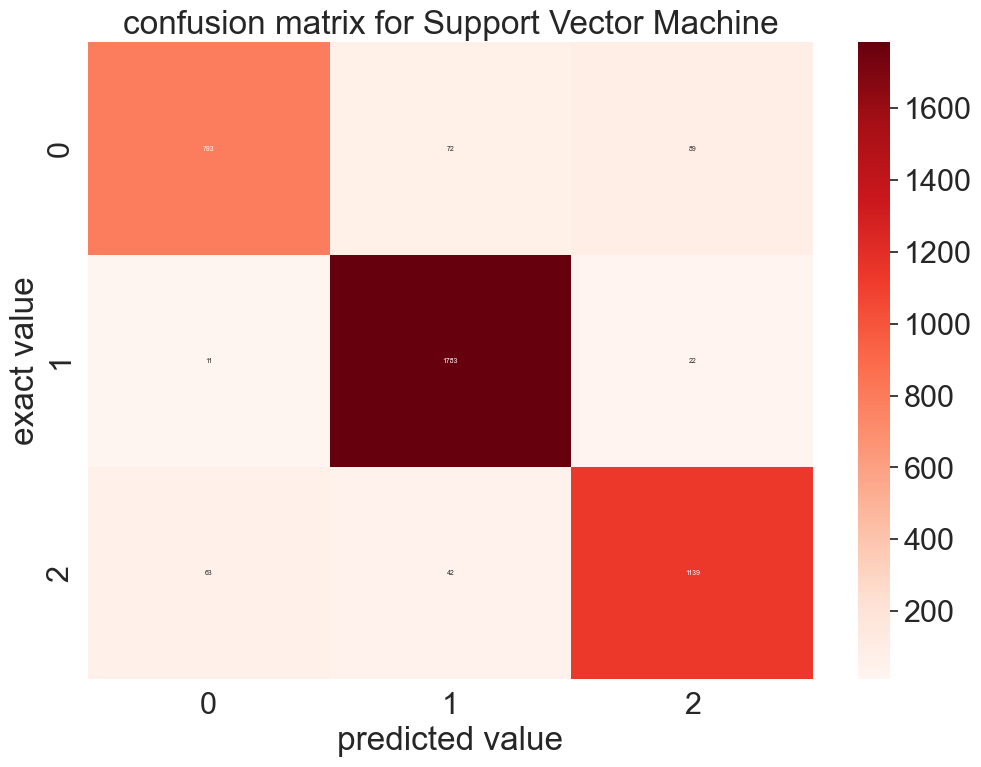

In [53]:
# confusion matrix for random forest

con_matrrix = confusion_matrix(y_test, y_pred_svm)

# Create a heatmap of the confusion matrix

sns.set(font_scale=2) # Set font size

sns.heatmap(con_matrrix, annot=True, annot_kws={"size": 5}, cmap='Reds', fmt='g') # Create heatmap
plt.xlabel('predicted value')
plt.ylabel('exact value')
plt.title('confusion matrix for Support Vector Machine')
plt.show()